In [1]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
diabetes=pd.read_csv('/content/drive/MyDrive/CURR-v3.X-MAR2023/UNIT3/DAY5/3.09 Dealing with imbalance, diabetes/diabetes.csv')
display(diabetes.head())
diabetes['Outcome'].value_counts(dropna=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0    500
1    268
Name: Outcome, dtype: int64

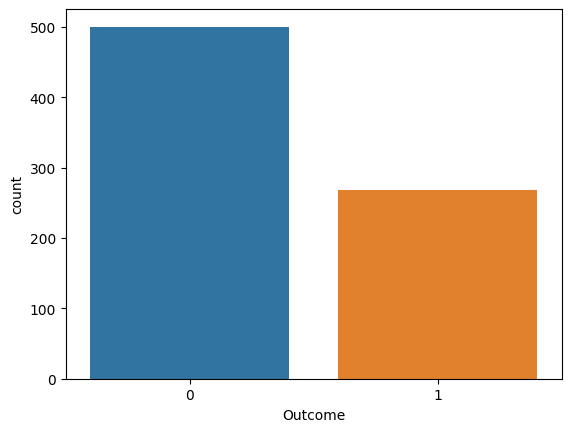

In [6]:
sns.countplot(x='Outcome', data=diabetes);
plt.show()

In [7]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Assumptions of Logistic Reg

## No colinearity

In [8]:
# X/y split
X = diabetes.drop('Outcome',axis = 1)
y = diabetes['Outcome']

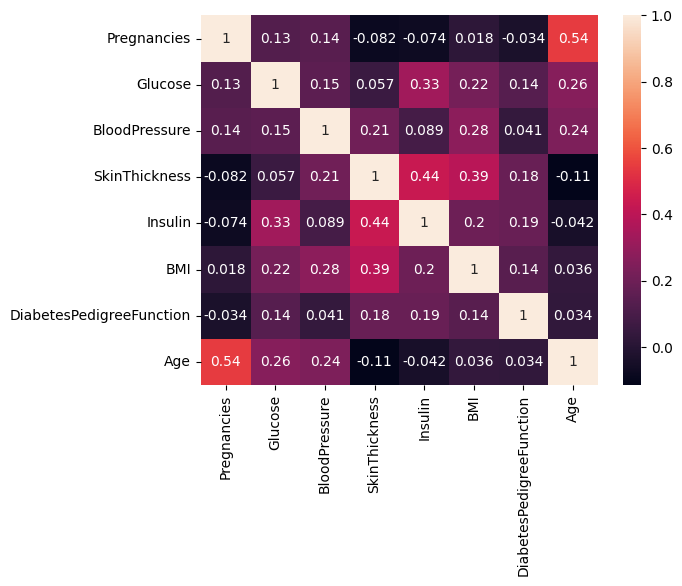

In [9]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Standardization of independent variables

In [10]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default test_size value is .2

In [11]:
y_train.isna().sum()
y_test.isna().sum()

0

In [12]:
# all features are numeric, so no need to split into _num and _cat. Transformer = scaler
transformer = StandardScaler() 
transformer.fit(X_train) # For every column values z = (x - mean(x_train))/sd(x_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,1.507552,-1.015215,-0.404519,-1.319215,-0.718238,-1.220701,-0.983259,-0.048640
127,-0.829864,-0.099647,-0.615096,0.928730,0.083747,0.137191,-0.624936,-0.882466
564,-1.122041,-0.952072,0.543076,-1.319215,-0.718238,0.024033,0.398842,-0.548935
375,2.384083,0.594922,0.648364,1.365830,2.054583,0.879002,0.179030,2.035925
663,1.507552,0.752778,0.543076,1.553159,0.390891,0.715552,0.507242,0.535038


In [13]:
y_train.head()

762    0
127    0
564    0
375    1
663    1
Name: Outcome, dtype: int64

In [ ]:
#y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
#y_test = y_test.reset_index(drop=True) 

## Linear relation on logit - what?

In [ ]:
# remember linear regression? We expected the relation between x and y to actually be linear!
# should we expect the same from logistic regression?

The logistic transformation was:

$$p = \frac{1}{1+e^{-(b_{0}+b_{1}x_{1}+...)}}$$

If we invert both sides of the equation we get:

$$\frac{1}{p} =1+e^{-(b_{0}+b_{1}x_{1}+...)}$$

Then, we can leave the exponential alone:

$$\frac{1}{p}-1 = e^{-(b_{0}+b_{1}x_{1}+...)}$$

$$log(\frac{1}{p}-1) = -(b_{0}+b_{1}x_{1}+...)$$

Finally, if we take logarithms in both sides of the equation and we change the sign, we get:

$$-log(\frac{1}{p}-1) = (b_{0}+b_{1}x_{1}+...)$$

$$-log(\frac{1}{p}-\frac{p}{p}) = (b_{0}+b_{1}x_{1}+...)$$

$$-log(\frac{1-p}{p}) = (b_{0}+b_{1}x_{1}+...)$$

$$log((\frac{1-p}{p})^{-1}) = (b_{0}+b_{1}x_{1}+...)$$

which is a linear model!

$$log(\frac{p}{1-p}) = (b_{0}+b_{1}x_{1}+...)$$

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

lr.predict(X_train_scaled) -> "Yes/No,Fraud/NoFraud,.."
lr.predict_proba(X_train_scaled)

In [15]:
lr.predict(X_train_scaled)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [ ]:
lr.predict_proba(X_train_scaled)

array([[0.92512795, 0.07487205],
       [0.78164841, 0.21835159],
       [0.90770432, 0.09229568],
       ...,
       [0.94010527, 0.05989473],
       [0.85359573, 0.14640427],
       [0.90517729, 0.09482271]])

In [16]:
lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1]

1.0

In [17]:
lr.predict_proba(X_train_scaled)[0,0] 

0.9251279514754582

In [18]:
lr.predict_proba(X_train_scaled)[0,1]

0.07487204852454181

In [19]:
lr.predict_proba(X_train_scaled).sum(axis=1) # in Pandas the axis for rows is 0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [20]:
lr.predict_proba(X_train_scaled).shape

(576, 2)

In [21]:
lr.predict_proba(X_train_scaled)[:5,1] # Rows up to 5 and second column

array([0.07487205, 0.21835159, 0.09229568, 0.81087795, 0.76435303])

In [22]:
lr.predict_proba(X_train_scaled)[:5,0] # Rows up to 5 and first column

array([0.92512795, 0.78164841, 0.90770432, 0.18912205, 0.23564697])

In [23]:
lr.predict(X_train_scaled)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

Let's compute the logarithm shown below:

$$log(\frac{p}{1-p})$$

In [24]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

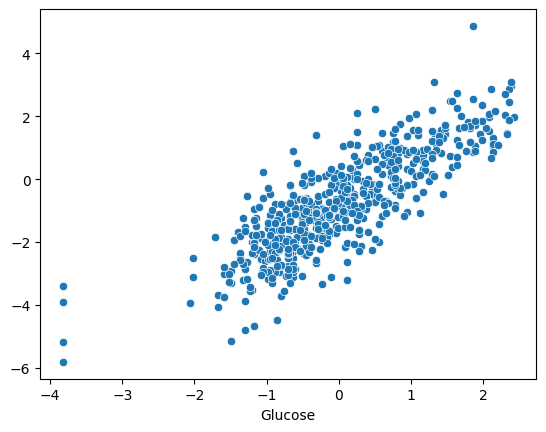

In [25]:
sns.scatterplot(y = logits,x = X_train_scaled['Glucose']);
plt.show()

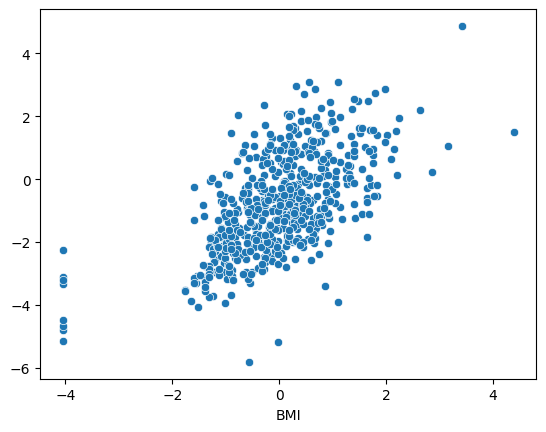

In [26]:
sns.scatterplot(y = logits,x = X_train_scaled['BMI']);
plt.show()

# Imbalance and metrics

0    500
1    268
Name: Outcome, dtype: int64


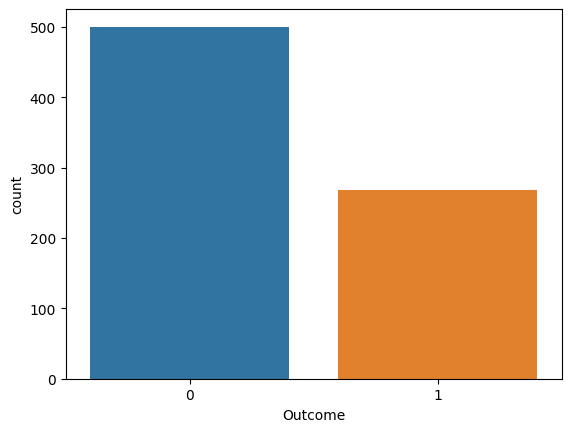

In [27]:
# while there are more imbalanced datasets, we have a significant imbalance
# and the cost of failing to detect the minority class is quite high (lack of diagnosis of diabetes)
count_classes = diabetes['Outcome'].value_counts()
print(count_classes)
sns.countplot(x = 'Outcome', data = diabetes);
plt.show()

In [28]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.30


We have a really big class imbalance!!!

# A relatively bad model

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.80


In [30]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.80
The precision in the TEST set is: 0.75
The recall in the TEST set is: 0.58
The F1 in the TEST set is: 0.65
The Kappa in the TEST set is: 0.52


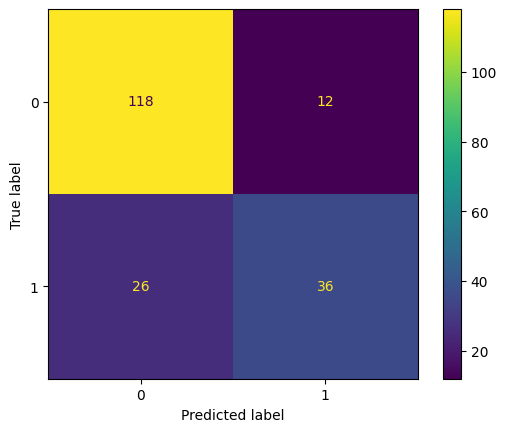

In [31]:
#we fail to identify 40%+ of diabetes cases!
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

# Oversampling / undersampling

Any resampling (oversampling, undersampling, SMOTE, Tomek,...etc) is only to be done on the TRAINING set **our test set still must reflect reality (which has imbalance)!**

## Oversampling the minority class

iloc

In [32]:
y_train[y_train == 0]

762    0
127    0
564    0
144    0
268    0
      ..
707    0
763    0
629    0
559    0
684    0
Name: Outcome, Length: 370, dtype: int64

In [ ]:
majority_indexes = y_train[y_train == 0].index
minority_indexes = y_train[y_train == 1].index

# Manual downsampling
# selected_rows = np.random.choice(majority_indexes,size = len(minority_indexes)) # defaul value of "replace" is False
# X_train_down = X_train.iloc[list(selected_rows),:]
# y_train_down = y_train[list(selected_rows)]

# Manual oversampling/upsampling
# selected_rows = np.random.choice(minority_indexes,size = len(majority_indexes), replace = True)
# X_train_up = X_train.iloc[list(selected_rows),:]
# y_train_up = y_train[list(selected_rows)]

In [33]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

In [34]:
print(X_train.shape)
print(y_train[y_train== 0].shape)

(576, 8)
(370,)


In [35]:
# separate majority/minority classes
ros = RandomOverSampler(random_state=42)

X_train_over, y_train_over = ros.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_over))
print(y_train_over.value_counts())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.507552,-1.015215,-0.404519,-1.319215,-0.718238,-1.220701,-0.983259,-0.048640,0
1,-0.829864,-0.099647,-0.615096,0.928730,0.083747,0.137191,-0.624936,-0.882466,0
2,-1.122041,-0.952072,0.543076,-1.319215,-0.718238,0.024033,0.398842,-0.548935,0
3,2.384083,0.594922,0.648364,1.365830,2.054583,0.879002,0.179030,2.035925,1
4,1.507552,0.752778,0.543076,1.553159,0.390891,0.715552,0.507242,0.535038,1


Resampled dataset shape Counter({0: 370, 1: 370})
0    370
1    370
Name: Outcome, dtype: int64


In [36]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of diabetes
lr = LogisticRegression(max_iter=1000) # default value of max_iter=300
lr.fit(X_train_over, y_train_over)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.77
The precision in the TEST set is: 0.63
The recall in the TEST set is: 0.71
The F1 in the TEST set is: 0.67
The Kappa in the TEST set is: 0.49


We didn't gain too much, in fact, the performance is slightly worse!

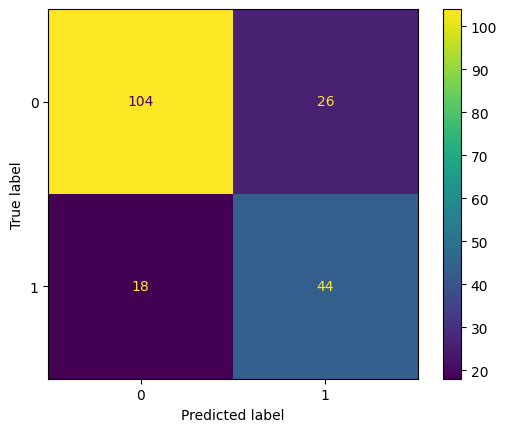

In [37]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

## Downsampling the majority class

In [38]:
from imblearn.under_sampling import RandomUnderSampler

In [39]:
y_train[y_train == 1].shape

(206,)

In [40]:
rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_under,y_train_under],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_under))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.537687,-0.225932,-0.088654,0.054529,-0.718238,-0.441171,-1.133814,-0.715701,0
1,0.631021,-0.920501,-0.404519,0.678958,0.356764,-0.026259,-1.154892,1.035334,0
2,1.215375,-0.289075,0.121922,-1.319215,-0.718238,-1.082397,1.118497,2.035925,0
3,0.631021,-1.078357,0.543076,-1.319215,-0.718238,-1.132690,-1.157903,-0.132022,0
4,0.338844,0.058210,0.227211,1.178502,-0.061292,0.237775,-0.600848,-0.465553,0


Resampled dataset shape Counter({0: 206, 1: 206})


In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_under, y_train_under)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.77
The precision in the TEST set is: 0.62
The recall in the TEST set is: 0.76
The F1 in the TEST set is: 0.68
The Kappa in the TEST set is: 0.51


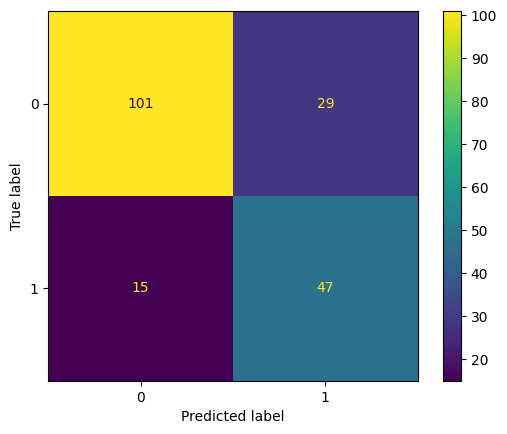

In [42]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

# SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [45]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(576, 8)
(740, 8)


In [46]:
y_train_SMOTE.value_counts()

0    370
1    370
Name: Outcome, dtype: int64

In [47]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.79
The precision in the TEST set is: 0.65
The recall in the TEST set is: 0.77
The F1 in the TEST set is: 0.71
The Kappa in the TEST set is: 0.55


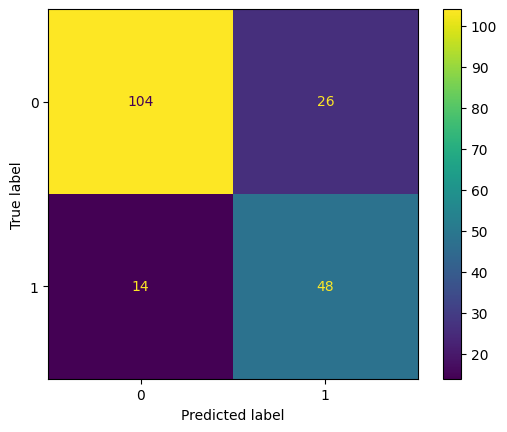

In [48]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [49]:
from imblearn.under_sampling import TomekLinks 

In [50]:
tl = TomekLinks()

X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)

display(pd.concat([X_train_tl,y_train_tl],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_tl))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.507552,-1.015215,-0.404519,-1.319215,-0.718238,-1.220701,-0.983259,-0.048640,0
1,-0.829864,-0.099647,-0.615096,0.928730,0.083747,0.137191,-0.624936,-0.882466,0
2,-1.122041,-0.952072,0.543076,-1.319215,-0.718238,0.024033,0.398842,-0.548935,0
3,2.384083,0.594922,0.648364,1.365830,2.054583,0.879002,0.179030,2.035925,1
4,1.507552,0.752778,0.543076,1.553159,0.390891,0.715552,0.507242,0.535038,1


Resampled dataset shape Counter({0: 332, 1: 206})


In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tl, y_train_tl)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.79
The precision in the TEST set is: 0.68
The recall in the TEST set is: 0.63
The F1 in the TEST set is: 0.66
The Kappa in the TEST set is: 0.50


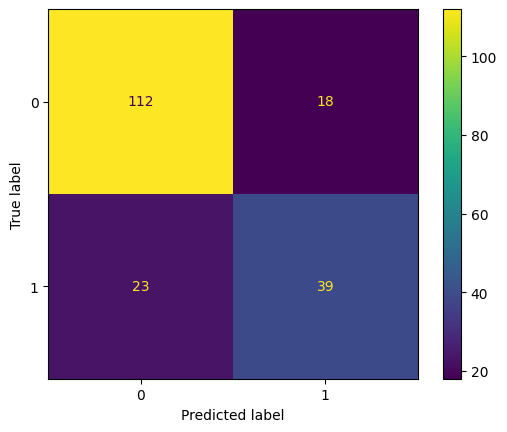

In [52]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [53]:
list(zip(list(X_test.columns), list(np.abs(lr.coef_)[0])))

[('Pregnancies', 0.3675540415566702),
 ('Glucose', 1.109744162104519),
 ('BloodPressure', 0.2143619758469395),
 ('SkinThickness', 0.07786744056116979),
 ('Insulin', 0.08475850763290722),
 ('BMI', 0.7155721633737216),
 ('DiabetesPedigreeFunction', 0.3492674650718482),
 ('Age', 0.26909603467219134)]

In [54]:
list(zip(list(X_test.columns), list(lr.coef_[0])))

[('Pregnancies', 0.3675540415566702),
 ('Glucose', 1.109744162104519),
 ('BloodPressure', -0.2143619758469395),
 ('SkinThickness', 0.07786744056116979),
 ('Insulin', -0.08475850763290722),
 ('BMI', 0.7155721633737216),
 ('DiabetesPedigreeFunction', 0.3492674650718482),
 ('Age', 0.26909603467219134)]